In [1562]:
import math
from random import uniform
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
import scipy.stats
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
 
from sklearn.svm import SVC, LinearSVC
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn import svm

import scipy.stats
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np # linear algebra


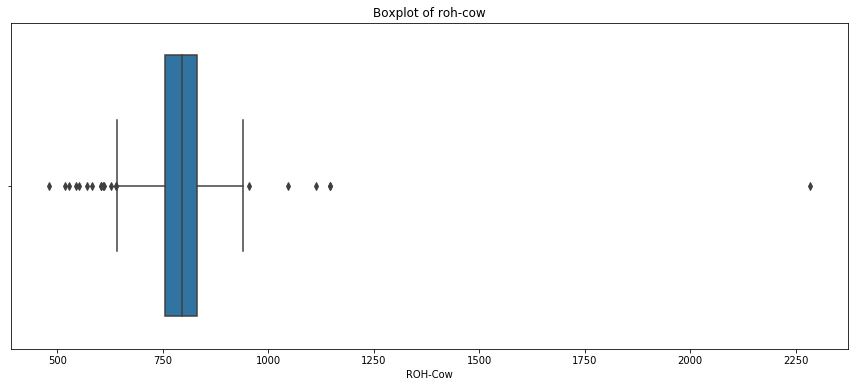

1217
1204


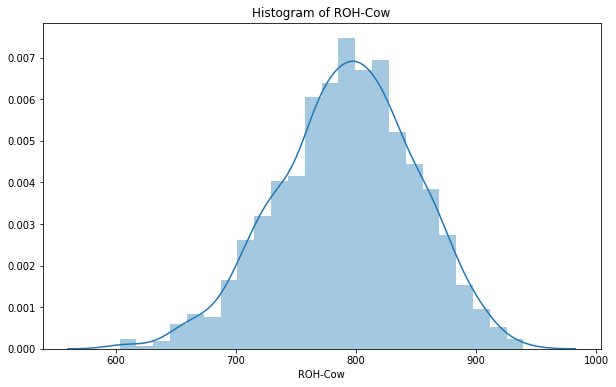

In [1563]:
from sklearn.preprocessing import StandardScaler
# read data from excel file
df = pd.read_excel('Measures.xlsx')


# drop column, because it's dosent metter for learning
def removeBadColumns(df: pd.DataFrame) -> None:
    del df['Case #']
    del df['Cow']
    del df['Sire']
    del df['Birth year']
    del df['Dam']
    del df['inbreeding']
    
removeBadColumns(df)



#df = shuffle(df)
def boxplotOfData(df: pd.DataFrame, columnName: str) -> None:
    plt.figure(figsize=(15,6))
    
    sns.boxplot(x=columnName, data=df)
    plt.ticklabel_format(style='plain', axis='x')
    plt.title('Boxplot of roh-cow')
    plt.show()
    
def removeRowsNotInRange(df: pd.DataFrame, columnName, startRange, endRange) -> pd.DataFrame:
    df = df[(df[columnName] >= startRange) & (df[columnName] <= endRange)]
    return df
    
boxplotOfData(df, 'ROH-Cow')
print(len(df))
df = removeRowsNotInRange(df, 'ROH-Cow', startRange=600, endRange=950)
print(len(df))

plt.figure(figsize=(10, 6))
sns.distplot(df['ROH-Cow'])
plt.title('Histogram of ROH-Cow')
plt.show()

#df['ROH-Cow'] = StandardScaler().fit_transform(np.log(df['ROH-Cow']).values.reshape(-1, 1))
#print(df['ROH-Cow'])
#plt.figure(figsize=(10, 6))
#sns.distplot(df['ROH-Cow'])
#plt.title('Histogram of Normalised ROH-Cow')
#plt.show()

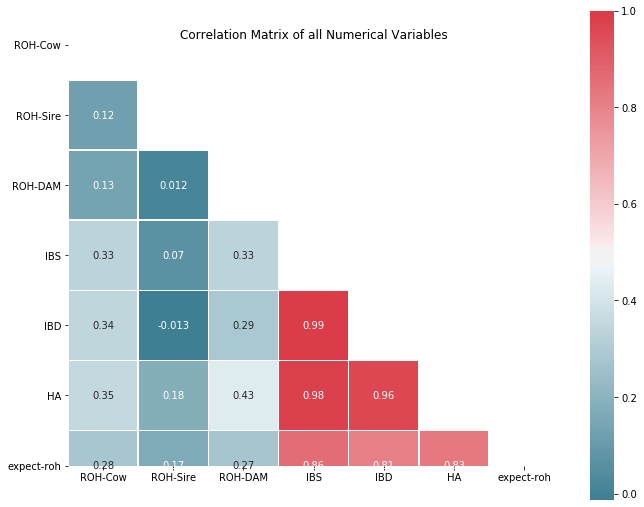

In [1564]:
from sklearn.preprocessing import StandardScaler

def correlationMatrix(df: pd.DataFrame) -> None:
    # Compute the correlation matrix
    d = df[['ROH-Cow' , 'ROH-Sire', 'ROH-DAM' , 'IBS', 'IBD', 'HA', 'expect-roh'  ]]
    corr = d.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask,
                square=True, linewidths=.5, annot=True, cmap=cmap)
    plt.yticks(rotation=0)
    plt.title('Correlation Matrix of all Numerical Variables')
    plt.show()
correlationMatrix(df)



data_target = df['ROH-Cow']
df = df.drop('ROH-Cow', 1)

In [1565]:
import numpy as np
from sklearn.model_selection import train_test_split

df = df.drop('ROH-DAM' ,1 )
df = df.drop('ROH-Sire' ,1 )
#df = df.drop('IBS' , 1)
#df = df.drop('IBD' , 1)
#df = df.drop('HA' , 1)
#df = df.drop('expect-roh' , 1)

#train, test, target, target_test
#x_train, x_test, y_train , y_test = train_test_split(df.values , data_target.values, test_size=0.265, random_state=0)

x_train = df.values[:1103]
x_test = df.values[1103:]
y_train = data_target.values[:1103]
y_test = data_target.values[1103:]

# normalize x_train and x_test matrix

means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)
x_train = (x_train - means) / stds
x_test = (x_test - means) / stds




x_train = np.array(x_train)
y_train = np.array(y_train)



In [1566]:
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

mlp = MLPRegressor()
parameter_space = {'hidden_layer_sizes': [1,2,3,4,5,6,7,8,9,10,20,30,40],
'activation': ['relu'],
'solver':['lbfgs'], 'alpha':[0.0001],
'batch_size':['auto'], 'learning_rate':['constant'],
'learning_rate_init':[0.001], 'max_iter':[500]}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)

y_pred_train = clf.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
# Make predictions using the testing set
y_pred = clf.predict(x_test)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


tuned hpyerparameters :(best parameters)  {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'hidden_layer_sizes': 6, 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'lbfgs'}
Mean Squared Error - train: 2367.639896365927
Root Mean Squared Error - train: 48.65840005966007
Coefficient of determination: 0.15
Mean Squared Error: 2680.63630392336
Root Mean Squared Error: 51.77486169873716


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Actual,Predicted
0,805.355581,874.324649
1,850.392076,823.535824
2,816.120833,829.428945
3,864.405588,885.261256
4,891.769987,837.887458
...,...,...
96,879.486664,816.797566
97,793.793101,779.974594
98,808.187261,786.441319
99,764.928467,761.471046


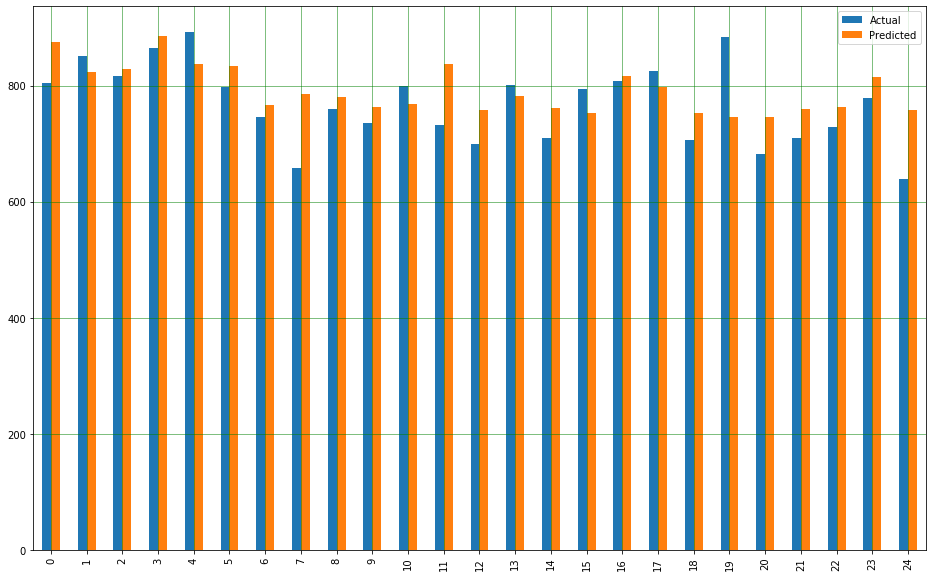

C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


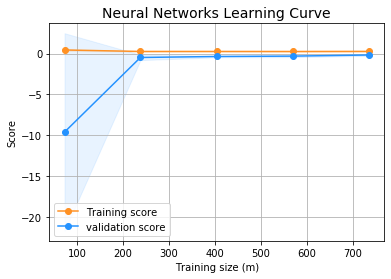

In [1567]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train , n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("Neural Networks Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")



In [1568]:

params = {'n_neighbors':[1,2,3,4,5,6,7,8,9 ,10,11,12,13,14, 15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
print(model.best_params_)
y_pred_train = model.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
# Make predictions using the testing set
y_pred = model.predict(x_test)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))



{'n_neighbors': 28}
Mean Squared Error - train: 2346.5807112238394
Root Mean Squared Error - train: 48.44151846529834
Coefficient of determination: 0.10
Mean Squared Error: 2810.341630702645
Root Mean Squared Error: 53.01265538248999


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


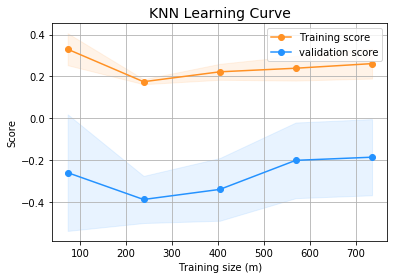

In [1569]:
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train , n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("KNN Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

In [1570]:
print("Linear Regression with gridsearchCV")
regr = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False] , 'n_jobs' : [1,-1]}
grid_cv = GridSearchCV(regr,parameters, cv=10)
grid_cv.fit(x_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid_cv.best_params_)

y_pred_train = grid_cv.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Make predictions using the testing set
y_pred = grid_cv.predict(x_test)


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(grid_cv, x_train, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)


df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df


Linear Regression with gridsearchCV


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


tuned hpyerparameters :(best parameters)  {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
Mean Squared Error - train: 2689.1209828733445
Root Mean Squared Error - train: 51.85673517368158
Coefficient of determination: 0.02
Mean Squared Error: 3090.188215078689
Root Mean Squared Error: 55.5894613670495


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: Deprecation

Average 5-Fold CV Score: -0.23539067204770436
[-0.5179958  -0.01794909 -0.17885754 -0.23754246 -0.22460846]


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,Actual,Predicted
0,805.355581,968.964350
1,850.392076,849.277772
2,816.120833,841.315917
3,864.405588,970.397344
4,891.769987,845.748083
...,...,...
96,879.486664,803.199293
97,793.793101,774.403277
98,808.187261,786.950453
99,764.928467,776.794501


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


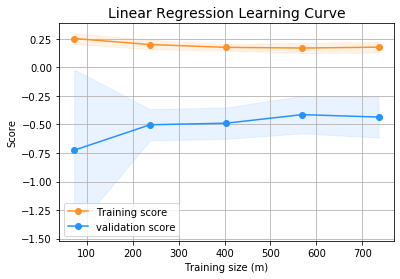

In [1571]:
#df1 = df.head(25)
#df1.plot(kind='bar',figsize=(16,10))
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.show()
from sklearn.model_selection import GridSearchCV, learning_curve

import matplotlib.pyplot as plt
#plt.ylim(0.5, 1.01)
train_sizes, train_scores, test_scores = learning_curve(grid_cv, x_train, y_train , n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("Linear Regression Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")


    

In [1572]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.3, 0.5, 0.7], #so called `eta` value
              'max_depth': [1,2,3,4,5],   
              'colsample_bytree': [0.7,0.3],
              'n_estimators': [500,10], 
              'alpha': [5]
              }

xgb_grid = GridSearchCV(xgb1,parameters,cv = 2,n_jobs = 5,verbose=True)

xgb_grid.fit(x_train,y_train)


print(xgb_grid.best_params_)
y_pred = xgb_grid.predict(x_test)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))


y_pred_train = xgb_grid.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Make predictions using the testing set
y_pred = xgb_grid.predict(x_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(xgb_grid, x_train, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)


Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    6.6s
[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:   12.5s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
{'alpha': 5, 'colsample_bytree': 0.7, 'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 10, 'nthread': 4, 'objective': 'reg:linear'}
Mean Squared Error - train: 2397.877951457604
Root Mean Squared Error - train: 48.96813199885824
Coefficient of determination: 0.10
Mean Squared Error: 2832.0208575754373
Root Mean Squared Error: 53.2167347511611
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    8.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    9.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    9.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    9.1s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:31:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits
[09:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Average 5-Fold CV Score: -0.08556054156505122
[-0.17213689  0.11875721 -0.16384373 -0.2286476   0.01806831]


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    7.5s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    3.0s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    4.1s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    5.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    5.8s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    6.6s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    2.9s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    4.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    5.0s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    5.7s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    8.0s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    3.0s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    4.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    5.2s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    5.9s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[09:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 2 folds for each of 60 candidates, totalling 120 fits
[09:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[09:33:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=5)]: Done 120 out of 120 | elapsed:    6.7s finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


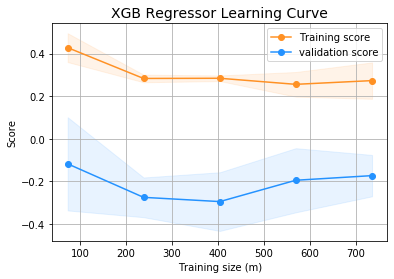

In [1573]:
#plt.ylim(0.5, 1.01)
train_sizes, train_scores, test_scores = learning_curve(xgb_grid, x_train, y_train)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("XGB Regressor Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

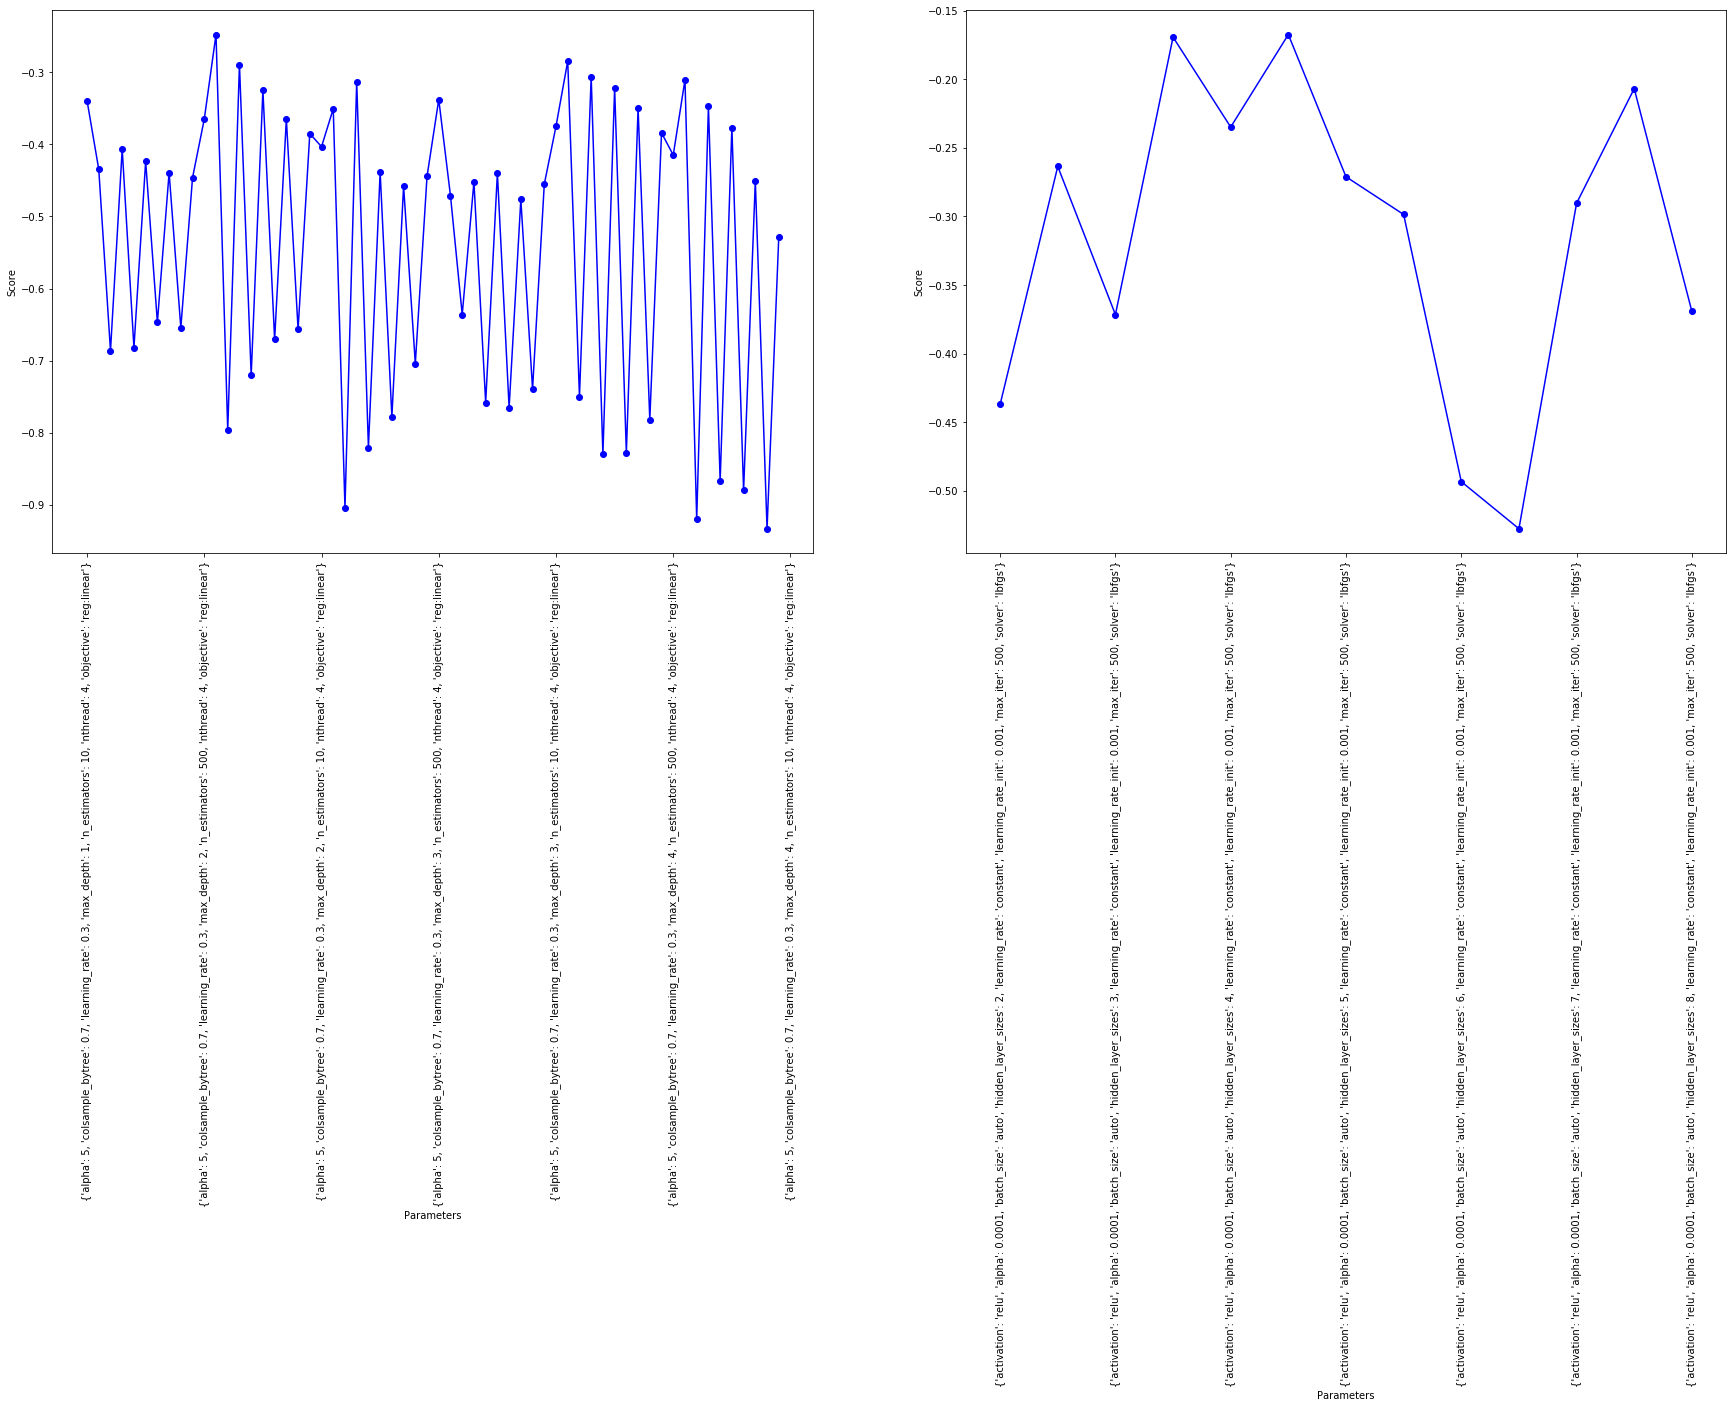

In [1574]:
def plot_params_effect(lr_cv_results, svc_cv_results):
    f, (ax2, ax3) = plt.subplots(1, 2, figsize=(30, 10))
   
    lr_params = [str(value) for value in lr_cv_results['params']]
    ax2.plot(range(len(lr_params)), lr_cv_results['mean_test_score'], 'o-', color='blue')
    ax2.set_xticklabels(lr_params, rotation='vertical', fontsize=10)
    ax2.set_xlabel('Parameters')
    ax2.set_ylabel('Score')

    svc_params = [str(value) for value in svc_cv_results['params']]
    ax3.plot(range(len(svc_params)), svc_cv_results['mean_test_score'], 'o-', color='blue')
    ax3.set_xticklabels(svc_params,  rotation='vertical', fontsize=10)
    ax3.set_xlabel('Parameters')
    ax3.set_ylabel('Score')
    
    plt.show()
    
plot_params_effect(xgb_grid.cv_results_, clf.cv_results_)

In [1577]:
# ------------------------------------------------------------------------
# ------------------------Random Forest-----------------------------------
# ------------------------------------------------------------------------
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [20,80, 90, 100, 110],
    'max_features': [2, 3 , 'sqrt'],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [5, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000,1200]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


grid_search.fit(x_train,y_train)
# Apply The Full Featured Classifier To The Test Data
y_pred = grid_search.predict(x_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))


y_pred_train = grid_search.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

print(grid_search.best_params_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Compute 5-fold cross-validation scores: cv_scores
#cv_scores_linreg = cross_val_score(grid_search, x_train, y_train, cv=5)
#print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
#print(cv_scores_linreg)


Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 19.8min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 24.2min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed: 26.4min finished
C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  Deprec

Coefficient of determination: -0.00
Mean Squared Error - train: 1397.8544818505095
Root Mean Squared Error - train: 37.38789218250354
{'bootstrap': True, 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}
Coefficient of determination: -0.00
Mean Squared Error: 3143.0010025487354
Root Mean Squared Error: 56.06247410299277


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


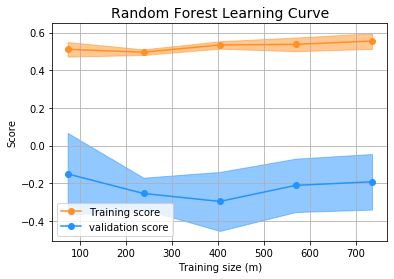

In [1579]:
from sklearn.model_selection import GridSearchCV, learning_curve

import matplotlib.pyplot as plt
#plt.ylim(0.5, 1.01)
train_sizes, train_scores, test_scores = learning_curve(grid_search, x_train, y_train , n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.5, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.5, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("Random Forest Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

   
    

In [1580]:
# using the default CV
alphas = [0.1, 1, 10, 100, 1e3, 1e4, 2e4, 5e4, 8e4, 1e5, 1e6, 1e7, 1e8]
reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
#reg.fit(train_x, train_y, sample_weight=sample_weight)
reg.fit(x_train, y_train)
cv_mse = np.mean(reg.cv_values_, axis=0)
#print("alphas: %s" % alphas)
#print("CV MSE: %s" % cv_mse)
print("Best alpha using built-in RidgeCV: %f" % reg.alpha_)

# generate the prediction using the best model
alpha = reg.alpha_
reg = linear_model.Ridge(alpha=alpha)
#reg.fit(train_x, train_y, sample_weight=sample_weight)
reg.fit(x_train, y_train)



y_pred_train = reg.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# Make predictions using the testing set
y_pred = reg.predict(x_test)


# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(reg, x_train, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

Best alpha using built-in RidgeCV: 0.100000
Mean Squared Error - train: 2689.164112615925
Root Mean Squared Error - train: 51.85715102679596
Coefficient of determination: 0.01
Mean Squared Error: 3100.280302727679
Root Mean Squared Error: 55.680160764204686
Average 5-Fold CV Score: -0.23898034387189293
[-0.51801887 -0.01796874 -0.18006368 -0.23845729 -0.24039314]


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


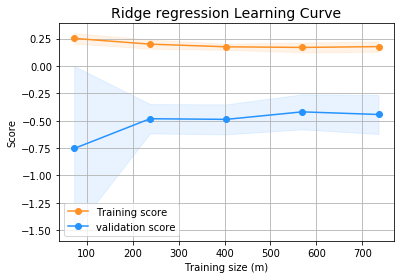

In [1581]:
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
#plt.ylim(0.5, 1.01)
train_sizes, train_scores, test_scores = learning_curve(reg, x_train, y_train , n_jobs=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("Ridge regression Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

 

    

In [ ]:
from sklearn.svm import SVR
import numpy as np
import sklearn

from sklearn.model_selection import GridSearchCV


parameters = {'kernel': ('linear', 'rbf','poly' , 'sigmoid'), 'C':[1,5,1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


y_pred = clf.predict(x_test)
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

y_pred_train = clf.predict(x_train)
print('Mean Squared Error - train:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error - train:', np.sqrt(mean_squared_error(y_train, y_pred_train)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

# Compute 5-fold cross-validation scores: cv_scores
cv_scores_linreg = cross_val_score(clf, x_train, y_train, cv=5)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores_linreg)))
# Print the 5-fold cross-validation scores
print(cv_scores_linreg)

In [ ]:

#plt.ylim(0.5, 1.01)
train_sizes, train_scores, test_scores = learning_curve(clf, x_train, y_train)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1, color="#ff9124", )
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
plt.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff", label="validation score")
plt.title("svm.svr Learning Curve", fontsize=14)
plt.xlabel('Training size (m)')
plt.ylabel('Score')
plt.grid(True)
plt.legend(loc="best")

   
    